# Entrenamiento de la red neuronal

En esta parte ya se entrena a la red con las imagenes reducidas

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt

2023-03-19 02:33:52.750915: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 02:33:52.923334: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-19 02:33:52.923358: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-19 02:33:53.744544: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [2]:
with open('x_train_scaled', 'rb') as f:
    x_train_scaled = pickle.load(f)
with open('x_test_scaled', 'rb') as f:
    x_test_scaled = pickle.load(f)
with open('labels86x86', 'rb') as f:
    labels = pickle.load(f)

In [3]:
y_train = labels.loc[:140000-1]
y_test = labels.loc[140000:]

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_num = le.transform(y_train)
y_test_num = le.transform(y_test)

In [5]:
le.classes_

array(['apple', 'asparagus', 'banana', 'broccoli', 'onion', 'pineapple',
       'strawberry', 'watermelon'], dtype=object)

In [6]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(200,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(8, activation='softmax')
])

2023-03-19 02:33:57.977331: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-19 02:33:57.977364: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-19 02:33:57.977388: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2023-03-19 02:33:57.977637: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(0.001))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 256)               51456     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               1

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [10]:
hst = model.fit(x_train_scaled, y_train_num, validation_split=0.1, epochs=100, callbacks=[callback])

Epoch 1/100
3938/3938 [==============================] - 34s 8ms/step - loss: 0.7466 - accuracy: 0.7448 - val_loss: 0.4755 - val_accuracy: 0.8388
Epoch 2/100
3938/3938 [==============================] - 32s 8ms/step - loss: 0.5041 - accuracy: 0.8299 - val_loss: 0.4449 - val_accuracy: 0.8472
Epoch 3/100
3938/3938 [==============================] - 30s 8ms/step - loss: 0.4502 - accuracy: 0.8495 - val_loss: 0.3852 - val_accuracy: 0.8671
Epoch 4/100
3938/3938 [==============================] - 30s 8ms/step - loss: 0.4155 - accuracy: 0.8611 - val_loss: 0.3801 - val_accuracy: 0.8711
Epoch 5/100
3938/3938 [==============================] - 30s 8ms/step - loss: 0.3908 - accuracy: 0.8691 - val_loss: 0.3646 - val_accuracy: 0.8779
Epoch 6/100
3938/3938 [==============================] - 32s 8ms/step - loss: 0.3765 - accuracy: 0.8743 - val_loss: 0.3563 - val_accuracy: 0.8796
Epoch 7/100
3938/3938 [==============================] - 30s 8ms/step - loss: 0.3642 - accuracy: 0.8774 - val_loss: 0.3586 -

In [11]:
preds = model.predict(x_test_scaled)

625/625 [==============================] - 1s 2ms/step


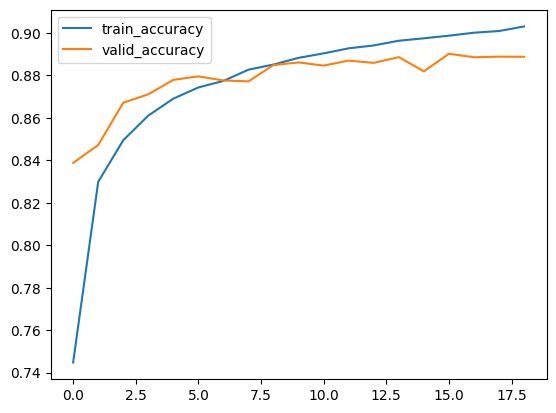

In [12]:
plt.plot(hst.history["accuracy"], label="train_accuracy")
plt.plot(hst.history["val_accuracy"], label="valid_accuracy")
plt.legend()

In [13]:
foods = le.classes_

def labeled(preds):
    dic = {}
    for p in preds:
        for i in range(8):
            dic[foods[i]] = p[i]
    return dic


In [14]:
model.save("neuralNet")

INFO:tensorflow:Assets written to: neuralNet/assets


INFO:tensorflow:Assets written to: neuralNet/assets


In [15]:
labeled([preds[3000]]), y_test[143000]

({'apple': 3.3427077e-19,
  'asparagus': 9.758289e-17,
  'banana': 2.2797222e-17,
  'broccoli': 0.99999994,
  'onion': 1.5168084e-12,
  'pineapple': 2.5300358e-16,
  'strawberry': 3.586717e-14,
  'watermelon': 2.4209064e-11},
 'broccoli')